# 💳 Day 1 - Credit Card Fraud Detection
### Advanced Data Cleaning & Outlier Detection Pipeline using Isolation Forests and Robust Scaling

A machine learning project to detect fraudulent transactions using Logistic Regression, Decision Tree, Random Forest, XGBoost, and LightGBM.

---

## 1. Introduction

Credit card fraud is a growing concern in the digital era, where millions of transactions occur every day. Detecting fraudulent transactions accurately and efficiently is essential to prevent financial losses and ensure secure payment systems. Traditional rule-based approaches often struggle to adapt to evolving fraud patterns, making **Machine Learning (ML)** a powerful alternative.

This project focuses on developing a **Credit Card Fraud Detection System** using machine learning algorithms to classify transactions as *legitimate* or *fraudulent*. Since the dataset is **highly imbalanced**, techniques like **SMOTE** are applied to improve model training and detection accuracy.

Models such as **Logistic Regression**, **Decision Tree**, **Random Forest**, **XGBoost**, and **LightGBM** are trained and evaluated using metrics like **F1-Score**, **ROC-AUC**, and **Precision-Recall AUC**.

The ultimate goal is to identify the **best-performing model** and highlight the **key features** that influence fraud prediction, contributing to a more reliable and secure financial system.


---

## 2. Project Objectives

The main objective of this project is to build an effective **machine learning-based Credit Card Fraud Detection System** that can accurately identify fraudulent transactions from legitimate ones.  

### Specific objectives:
- **Understand and analyze** the credit card transaction dataset to identify patterns and trends.  
- **Handle data imbalance** using resampling techniques such as **SMOTE** to ensure fair model training.  
- **Engineer and preprocess features** to improve model performance and interpretability.  
- **Train and evaluate** multiple machine learning algorithms — Logistic Regression, Decision Tree, Random Forest, XGBoost, and LightGBM.  
- **Compare model performance** using key evaluation metrics such as **F1-Score**, **ROC-AUC**, and **Precision-Recall AUC**.  
- **Select the best-performing model** for fraud detection based on evaluation results.  
- **Identify the most influential features** contributing to fraudulent activities for deeper insights.  


---

## 3. Dataset Overview

The dataset used in this project is the **Credit Card Fraud Detection Dataset**, sourced from the [Kaggle – Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).  
It was provided by the **Machine Learning Group (Université Libre de Bruxelles)** in collaboration with **Worldline** as part of a research study on fraud detection.  

This dataset contains transactions made by European cardholders in **September 2013** and is widely used for benchmarking **fraud detection algorithms** due to its **high class imbalance** and **real-world financial transaction patterns**.

### Key Details:
- **Total Records:** 284,807 transactions  
- **Fraudulent Transactions:** 492 (≈ 0.172%)  
- **Type:** Highly imbalanced binary classification problem  
- **Features:**  
  - **30 columns total**  
  - `Time`: Seconds elapsed between each transaction  
  - `Amount`: Transaction amount  
  - `Class`: Target variable (1 = Fraud, 0 = Normal)  
  - `V1`–`V28`: Anonymized numerical features derived using **Principal Component Analysis (PCA)** for confidentiality  

This dataset provides an excellent foundation for applying and evaluating various **machine learning algorithms** to detect fraudulent activity in financial systems.


---

## 4. Methodology & Approach

This project follows a structured **machine learning workflow** to detect fraudulent credit card transactions effectively. The approach focuses on understanding data, handling class imbalance, and building optimized models for accurate fraud prediction.

### Steps Involved:

1. **Data Understanding & Exploration**  
   - Analyze the dataset to understand feature distributions and correlations.  
   - Identify missing values, outliers, and the degree of class imbalance.  

2. **Data Preprocessing**  
   - Scale numerical features using **RobustScaler** to reduce the impact of outliers.  
   - Split the dataset into **training and testing sets** for model evaluation.  

3. **Handling Class Imbalance**  
   - Apply **SMOTE (Synthetic Minority Over-sampling Technique)** to generate synthetic samples for the minority class (fraudulent transactions).  

4. **Model Training**  
   - Train multiple machine learning models:  
     **Logistic Regression**, **Decision Tree**, **Random Forest**, **XGBoost**, and **LightGBM**.  

5. **Model Evaluation**  
   - Evaluate each model using performance metrics such as **F1-Score**, **ROC-AUC**, and **Precision-Recall AUC**.  
   - Compare results to identify the **best-performing model**.  

6. **Feature Importance & Threshold Optimization**  
   - Analyze feature importance from tree-based models to identify key predictors of fraud.  
   - Perform **threshold tuning** to balance precision and recall for optimal fraud detection.  

7. **Result Interpretation & Insights**  
   - Summarize key findings, visualize results, and provide insights into patterns indicating fraudulent behavior.


---

---

## 5. Tools & Libraries Used

This project uses a combination of **data analysis**, **machine learning**, and **visualization tools** to handle preprocessing, model training, and evaluation effectively.

### 🧰 Tools:
- **Python** – Core programming language for analysis and model building  
- **Jupyter Notebook** – Interactive environment for development and visualization  
- **Microsoft Excel** – Initial data inspection and basic statistical review  
- **Power BI / Tableau** – For creating clear and interactive visual dashboards (optional)  

### 📚 Python Libraries:
- **pandas** – Data manipulation and analysis  
- **numpy** – Numerical computations  
- **matplotlib**, **seaborn** – Data visualization and exploratory analysis  
- **scikit-learn** – Machine learning models, preprocessing, metrics, and SMOTE  
- **xgboost** – Gradient boosting algorithm for high-performance modeling  
- **lightgbm** – Efficient boosting framework for large-scale data  
- **imblearn** – Handling imbalanced data using oversampling techniques like SMOTE  
- **joblib** – Saving and loading trained models for reuse  

These tools and libraries together provide a complete pipeline — from **data cleaning and visualization** to **model development, evaluation, and deployment**.


---

## 6. Importing Libraries


In [1]:
# Standard Library Imports
import warnings
from collections import Counter

# Data Handling & Analysis
import pandas as pd
import filedialpy as fp
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Persistence
import joblib

# Scikit-learn Modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Imbalanced Data Handling
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN

# Advanced ML Libraries
from xgboost import XGBClassifier
import lightgbm as lgb

#Styling & Configurations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
np.set_printoptions(precision = 4, suppress = True)
pd.set_option('display.float_format', '{:.4f}'.format)
warnings.filterwarnings('ignore')

print('All imports successful and configurations set!')

All imports successful and configurations set!


---

## 7. Data Loading & Initial Exploration

Before building the prediction models, it is important to **explore and understand the dataset** that will be used.  
This step involves loading the data, reviewing its structure, checking for missing values, and understanding basic statistics.  
Such exploration ensures that the dataset is clean, consistent, and ready for preprocessing and modeling.


#### Load the Dataset

In [2]:
df = pd.read_csv(fp.openFile())
print('Data Loaded!')
df.head()

Data Loaded!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


#### Dataset Shape

In [3]:
df.shape

(284807, 31)

#### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Statistical Summary

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0000,94813.8596,47488.1460,0.0000,54201.5000,84692.0000,139320.5000,172792.0000
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,284807.0000,0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


#### Check for Missing Values

In [11]:
print(df.isnull().sum().sum(), "missing values found.")

0 missing values found.


---

## 8. Data Imbalance Overview

In fraud detection problems, **data imbalance** is one of the biggest challenges.  
In this dataset, the number of legitimate transactions heavily outweighs the fraudulent ones — making it difficult for models to learn fraud patterns correctly.

When a dataset is imbalanced:
- The model may become **biased toward the majority class** (legitimate transactions).
- Metrics like **accuracy can be misleading** — a model predicting all transactions as “legitimate” could still achieve over 99% accuracy, despite failing to detect fraud.
- Important metrics like **Recall**, **Precision**, and **F1-score** become more relevant than accuracy.

Hence, it becomes crucial to apply **data balancing techniques** such as:
- **SMOTE (Synthetic Minority Oversampling Technique)**
- **Undersampling of the majority class**
- **Ensemble methods** (e.g., Random Forest, XGBoost with class weighting)


### Class Distribution

The following code displays and visualizes the class imbalance in the dataset.


In [13]:
class_counts = df['Class'].value_counts()
print(class_counts)
print('\nClass Distribution (%):')
class_dist = df['Class'].value_counts(normalize=True) * 100
print(f'Legitimate: {class_dist[0]:.2f}%')
print(f'Fraudulent: {class_dist[1]:.2f}%')

Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (%):
Legitimate: 99.83%
Fraudulent: 0.17%


From the results, we can see that:
- Legitimate transactions make up **99.83%**
- Fraudulent transactions account for only **0.17%**

Such an imbalance can make models **ignore the minority class (fraud)** unless proper resampling or algorithmic adjustments are applied.

Let's visualize this imbalance to get a better sense of the distribution.


#### Visualizing Class Distribution

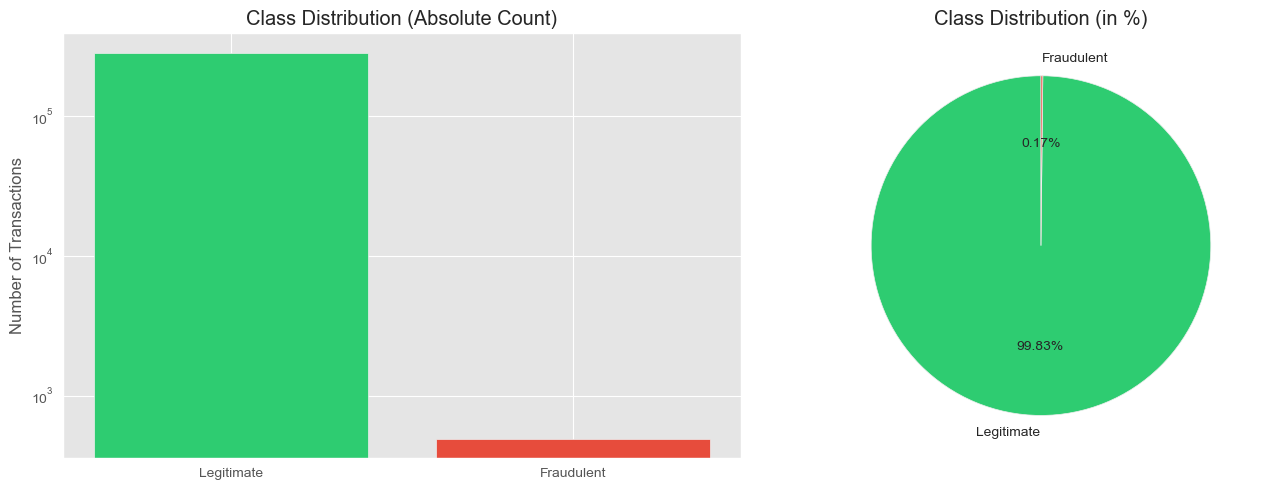

In [15]:
# Class Distribution Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Class Distribution (Absolute Count)
axes[0].bar(['Legitimate', 'Fraudulent'], class_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Class Distribution (Absolute Count)')
axes[0].set_yscale('log')

# Class Distribution (in %)
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(class_counts.values, labels=['Legitimate', 'Fraudulent'], autopct='%1.2f%%', colors=colors, startangle=90)
axes[1].set_title('Class Distribution (in %)')

plt.tight_layout()
plt.show()

The log-scaled bar chart and pie chart highlight how drastically fewer fraudulent transactions exist compared to legitimate ones.

Now, let’s look at **how transaction amounts differ** between legitimate and fraudulent transactions — this helps in identifying potential patterns.


#### Amount Distribution by Class

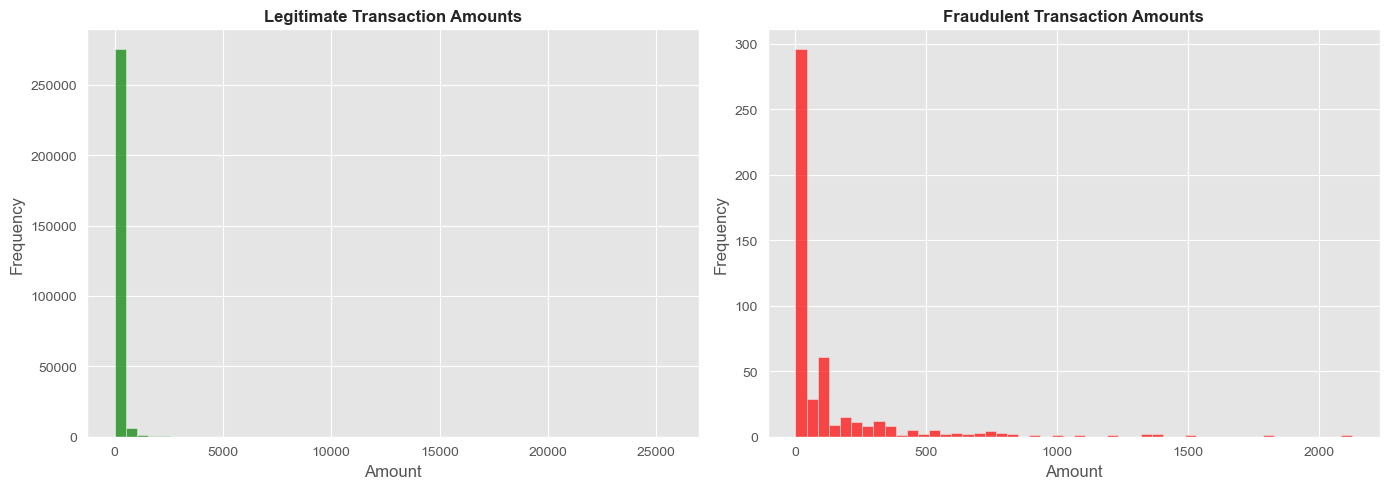

In [17]:
# Amount Distribution By Class Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Legitimate Transaction Plot
df[df['Class'] == 0]['Amount'].hist(bins=50, ax=axes[0], color='green', alpha=0.7) 
axes[0].set_title('Legitimate Transaction Amounts', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Fraudulent Transaction Plot
df[df['Class'] == 1]['Amount'].hist(bins=50, ax=axes[1], color='red', alpha=0.7) 
axes[1].set_title('Fraudulent Transaction Amounts', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

From the plots, we can observe that **fraudulent transactions tend to occur at varying amounts**, often smaller but more irregular, compared to legitimate ones.  
This insight will help guide **feature scaling and model training** in later stages.


---

## 9. Feature Engineering & Temporal Analysis

Feature Engineering plays a crucial role in enhancing model performance by identifying hidden relationships in the data.  
In this section, we analyze **temporal patterns** in fraudulent and legitimate transactions over two days using the `Time` variable (in seconds).  

By dividing transactions into **Day 1 (0–24 hours)** and **Day 2 (24–48 hours)**, we can uncover when frauds are most likely to occur — information that can be used to engineer **time-based features** such as:
- Hour of the day
- Transaction period (morning, afternoon, night)
- High-risk time windows


### Objective
To understand how fraudulent transactions vary over time and identify **high-risk periods** during the day.


### Temporal Visualization Code
The following visualizations show:
1. Volume of fraudulent transactions  
2. Fraud rate over time  
3. Distribution comparison using KDE (Kernel Density Estimation)


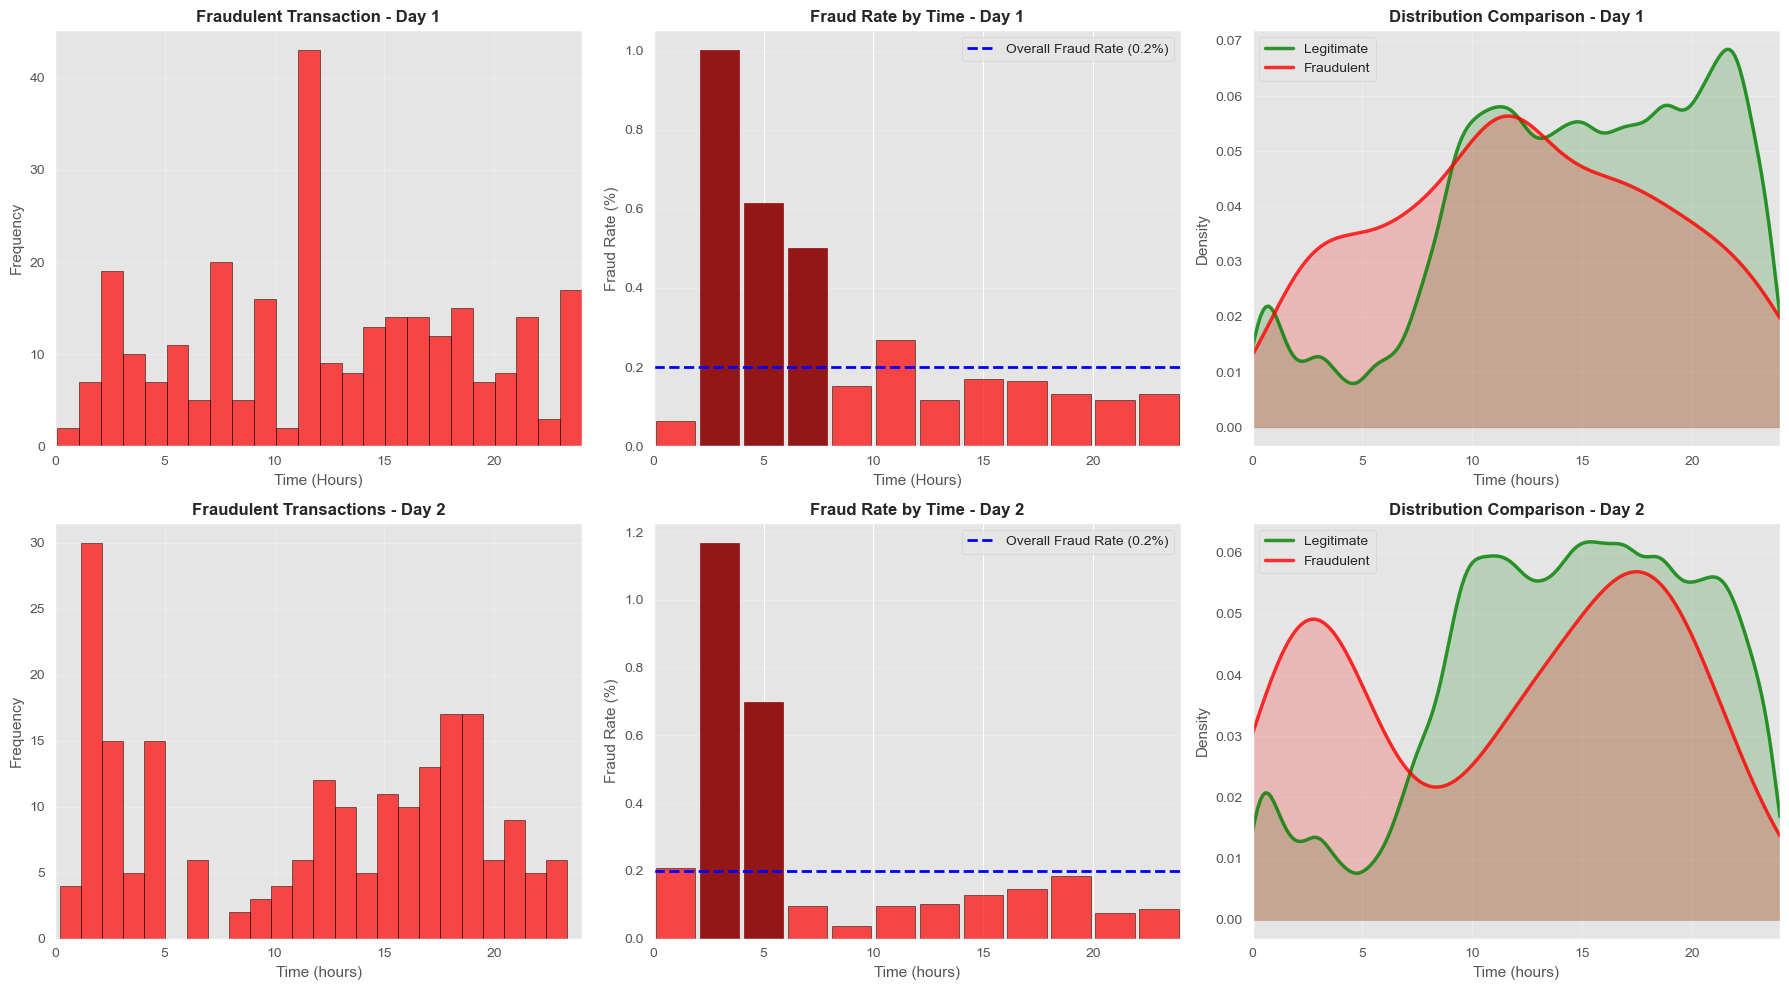

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

day1_mask = df['Time'] / 3600 < 24
day2_mask = df['Time'] / 3600  >= 24

day1_fraud = df[(df['Class'] == 1) & day1_mask]['Time'] / 3600
day2_fraud = (df[(df['Class'] == 1) & day2_mask]['Time'] / 3600) - 24

day1_legit = df[(df['Class'] == 0) & day1_mask]['Time'] / 3600
day2_legit = (df[(df['Class'] == 0) & day2_mask]['Time'] / 3600) - 24

# ==================================== Day 1 (Top Row) ====================================

# ------------------- PLot 1: Day 1 Fraudulent Transaction Volume -------------------
axes[0, 0].hist(day1_fraud, bins=24, alpha=0.7, color='red', edgecolor='black')
axes[0, 0].set_xlabel('Time (Hours)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Fraudulent Transaction - Day 1', fontsize=12, fontweight='bold')
axes[0, 0].set_xlim(0, 24)
axes[0, 0].grid(True, alpha=0.3)

# ------------------- Plot 2: Day 1 Fraud rate by Time -------------------
time_bins_day = np.linspace(0, 24, 13)  # 12 bins of 2 hours each
legit_counts_d1, _ = np.histogram(day1_legit, bins=time_bins_day)
fraud_counts_d1, _ = np.histogram(day1_fraud, bins=time_bins_day)
fraud_rate_d1 = fraud_counts_d1 / (legit_counts_d1 + fraud_counts_d1 + 1e-10) * 100
bin_centers_day = (time_bins_day[:-1] + time_bins_day[1:]) / 2

bars_d1 = axes[0, 1].bar(bin_centers_day, fraud_rate_d1, width=1.8, color='red', alpha=0.7, edgecolor='black')
axes[0,1].axhline(y=0.2, color='blue', linestyle='--', linewidth=2, label='Overall Fraud Rate (0.2%)')
# Highlight high-risk periods
for i, rate in enumerate(fraud_rate_d1):
    if rate > 0.5:
        bars_d1[i].set_color('darkred')
        bars_d1[i].set_alpha(0.9)

axes[0, 1].set_xlabel('Time (Hours)', fontsize=11)
axes[0, 1].set_ylabel('Fraud Rate (%)', fontsize=11)
axes[0, 1].set_title('Fraud Rate by Time - Day 1', fontsize=12, fontweight='bold')
axes[0, 1].set_xlim(0, 24)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Day 1 KDE
legit_kde_d1 = stats.gaussian_kde(day1_legit)
fraud_kde_d1 = stats.gaussian_kde(day1_fraud)
time_range_day = np.linspace(0, 24, 200)

axes[0, 2].plot(
    time_range_day,
    legit_kde_d1(time_range_day),
    color="green",
    linewidth=2.5,
    label="Legitimate",
    alpha=0.8,
)
axes[0, 2].plot(
    time_range_day,
    fraud_kde_d1(time_range_day),
    color="red",
    linewidth=2.5,
    label="Fraudulent",
    alpha=0.8,
)
axes[0, 2].fill_between(
    time_range_day, legit_kde_d1(time_range_day), alpha=0.2, color="green"
)
axes[0, 2].fill_between(
    time_range_day, fraud_kde_d1(time_range_day), alpha=0.2, color="red"
)
axes[0, 2].set_xlabel("Time (hours)", fontsize=11)
axes[0, 2].set_ylabel("Density", fontsize=11)
axes[0, 2].set_title("Distribution Comparison - Day 1", fontsize=12, fontweight="bold")
axes[0, 2].set_xlim(0, 24)
axes[0, 2].legend(fontsize=10)
axes[0, 2].grid(True, alpha=0.3)

# ============= DAY 2 (Bottom Row) =============

# Plot 4: Day 2 Fraudulent transaction volume
axes[1, 0].hist(day2_fraud, bins=24, alpha=0.7, color="red", edgecolor="black")
axes[1, 0].set_xlabel("Time (hours)", fontsize=11)
axes[1, 0].set_ylabel("Frequency", fontsize=11)
axes[1, 0].set_title("Fraudulent Transactions - Day 2", fontsize=12, fontweight="bold")
axes[1, 0].set_xlim(0, 24)
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Day 2 Fraud rate by time
legit_counts_d2, _ = np.histogram(day2_legit, bins=time_bins_day)
fraud_counts_d2, _ = np.histogram(day2_fraud, bins=time_bins_day)
fraud_rate_d2 = fraud_counts_d2 / (legit_counts_d2 + fraud_counts_d2 + 1e-10) * 100

bars_d2 = axes[1, 1].bar(bin_centers_day, fraud_rate_d2, width=1.8, color="red", alpha=0.7, edgecolor="black")
axes[1, 1].axhline(y=0.2, color="blue", linestyle="--", linewidth=2, label="Overall Fraud Rate (0.2%)")

# Highlight high-risk periods
for i, rate in enumerate(fraud_rate_d2):
    if rate > 0.5:
        bars_d2[i].set_color("darkred")
        bars_d2[i].set_alpha(0.9)

axes[1, 1].set_xlabel("Time (hours)", fontsize=11)
axes[1, 1].set_ylabel("Fraud Rate (%)", fontsize=11)
axes[1, 1].set_title("Fraud Rate by Time - Day 2", fontsize=12, fontweight="bold")
axes[1, 1].set_xlim(0, 24)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis="y")

# Plot 6: Day 2 KDE
legit_kde_d2 = stats.gaussian_kde(day2_legit)
fraud_kde_d2 = stats.gaussian_kde(day2_fraud)

axes[1, 2].plot(
    time_range_day,
    legit_kde_d2(time_range_day),
    color="green",
    linewidth=2.5,
    label="Legitimate",
    alpha=0.8,
)
axes[1, 2].plot(
    time_range_day,
    fraud_kde_d2(time_range_day),
    color="red",
    linewidth=2.5,
    label="Fraudulent",
    alpha=0.8,
)
axes[1, 2].fill_between(
    time_range_day, legit_kde_d2(time_range_day), alpha=0.2, color="green"
)
axes[1, 2].fill_between(
    time_range_day, fraud_kde_d2(time_range_day), alpha=0.2, color="red"
)
axes[1, 2].set_xlabel("Time (hours)", fontsize=11)
axes[1, 2].set_ylabel("Density", fontsize=11)
axes[1, 2].set_title("Distribution Comparison - Day 2", fontsize=12, fontweight="bold")
axes[1, 2].set_xlim(0, 24)
axes[1, 2].legend(fontsize=10)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("temporal_analysis_by_day.png", dpi=300, bbox_inches="tight")
plt.show()

### Interpretation of Temporal Patterns  

#### **1. Volume of Fraudulent Transactions (Left Column)**  
- **Day 1:** A sharp peak occurs between **10–12 hours (midday)** with around 45 frauds. Moderate activity persists throughout the day (5–20 frauds/hour).  
- **Day 2:** A different peak appears between **2–4 hours (early morning)** with about 30 frauds, and moderate spread later in the day.  
→ Fraudsters seem to exploit **different hours on different days**, possibly depending on monitoring activity


#### **2. Fraud Rate by Time (Middle Column)**  
The **fraud rate** is computed as:  

$$
\text{Fraud Rate} = \frac{\text{Number of Fraudulent Transactions}}{\text{Total Transactions}} \times 100
$$  

- **Day 1:** Fraud rate spikes during **1–6 hours**, up to **1.0%**, which is **five times the overall average (0.2%)**.  
- **Day 2:** Early morning (1–5 hours) shows the **highest risk**, up to **1.2%**, before stabilizing later in the day.  
→ **Early morning hours** show the **highest relative fraud risk**, even if transaction me is low.  


#### **3. Distribution Comparison (Right Column)**  
These plots use **Kernel Density Estimation (KDE)** to show transaction concentration smoothly.  

- **Day 1:** Fraudulent transactions dominate during **early morning**, while legitimate and fraud curves overlap near midday.  
- **Day 2:** Similar pattern — more frauds in early hours, and legitimate dominance toward evening.  

→ **High overlap regions** (e.g., midday) indicate time windows where **fraud detection becomes harder**, while separated peaks show **rer fraud signals**.  


### Key Insights  
- Fraud tends to **peak during off-peak hours** (early morning) when supervision is lower.  
- Fraudulent activity **varies by day**, suggesting **adaptive attack strategies**.  
- These findings can inform **feature creation**, such as:  
  - `is_night_transaction`  
  - `fraud_rate_by_hour`  
  - `time_pd` (morning, afternoon, night)  


### Conclusion  
Temporal analysis reveals that fraudsters exploit specific time windows, especially during low-activity hours.  
This insight helps in **feature engineering for improved model accuracy** and the development

----

## 10. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding data characteristics, detecting patterns, and identifying relationships between features before applying machine learning models.

In this section, we visualize the correlation structure among features and analyze transaction amount distributions to identify outliers and class-specific patterns.


#### 1. Correlation Matrix

The correlation matrix shows how features are related to each other.  
Highly correlated variables may indicate redundancy, while low correlation suggests feature independence.


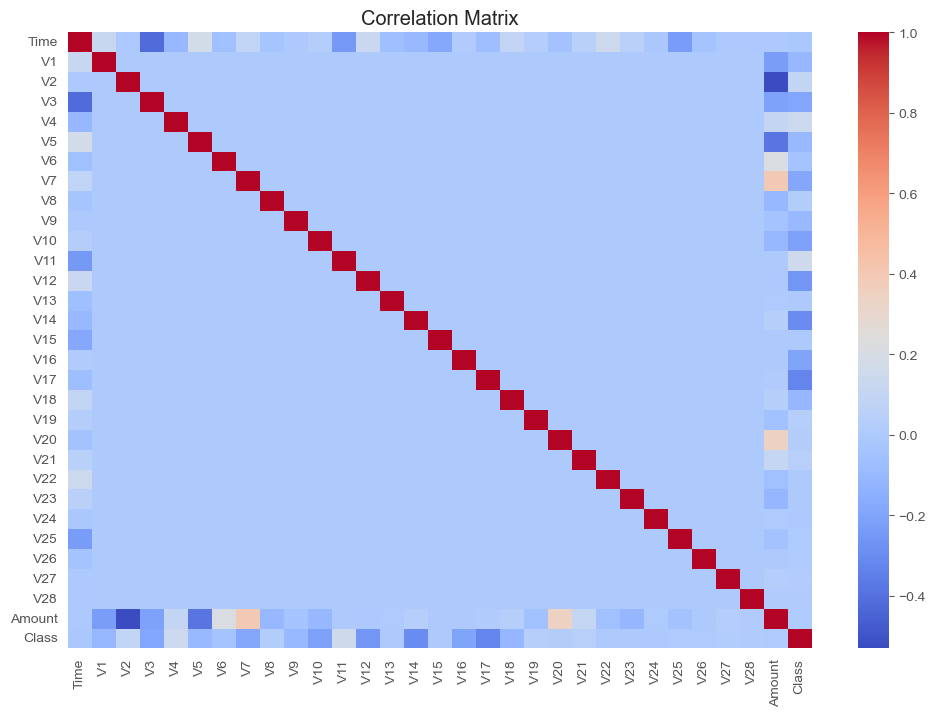

In [21]:
# Correlation matrix
corr_matrix = df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Interpretation**

- Most PCA features (**V1–V28**) show minimal correlation with each other, confirming the **PCA transformation** has effectively removed redundancy.
- Features **‘Amount’** and **‘Time’** have **weak correlations** with other variables and the target class, suggesting they may require **scaling or transformation** before modeling.
- The **target variable (‘Class’)** has low correlation values, which is typical in imbalanced fraud datasets where fraud patterns are subtle and nonlinear.


#### 2. Boxplot of Transaction Amount

The box plot provides insight into the distribution and spread of transaction amounts and helps detect **outliers** or **extreme values** that could influence the model.


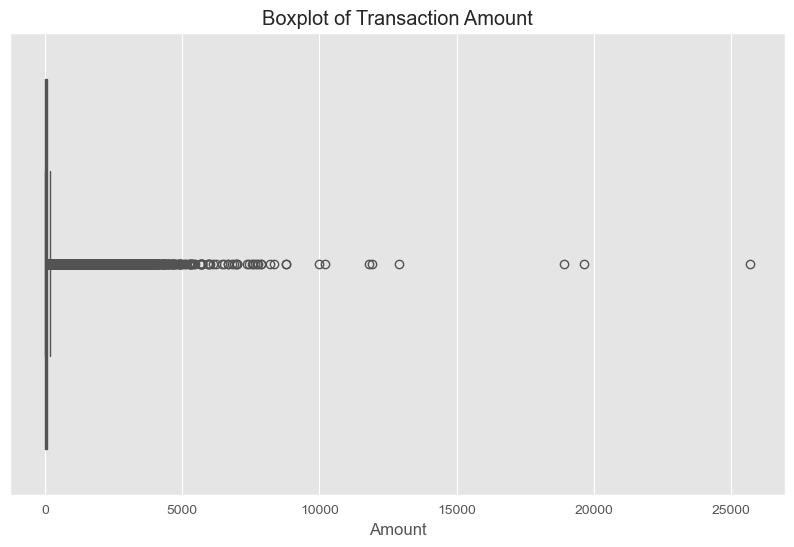

In [23]:
# Visualize outliers in the 'Amount' feature using a box plot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

**Interpretation**

- The transaction amounts are **highly skewed**, with most transactions concentrated below 1,000 units.
- A few transactions extend above **20,000 units**, which represent **potential outliers**.
- These outliers can distort model training and may need **log transformation** or **scaling** to normalize their influence.


#### 3. Transaction Amount vs. Class (Fraud vs Non-Fraud)

This plot compares how transaction amounts differ between **fraudulent** and **legitimate** transactions.


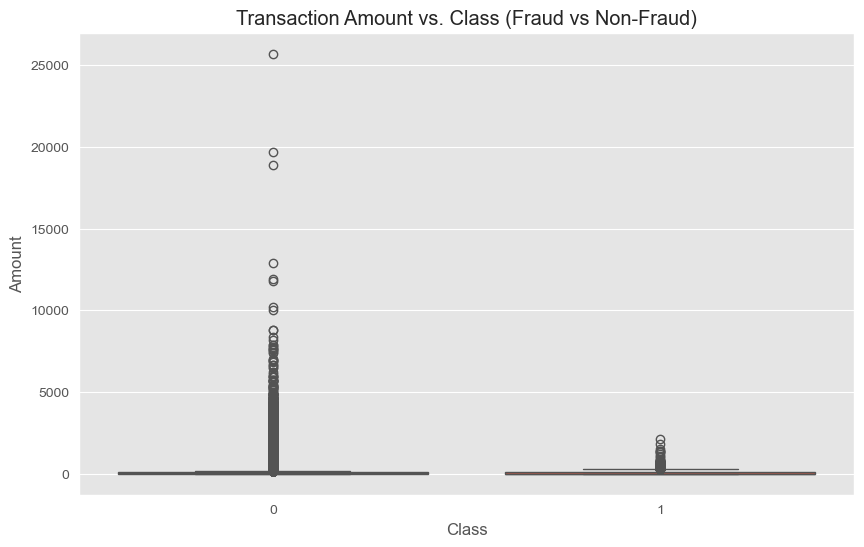

In [25]:
# Visualize the amount of fraudulent and non-fraudulent transactions
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount vs. Class (Fraud vs Non-Fraud)')
plt.show()

**Interpretation**

- Fraudulent transactions (Class = 1) generally involve **smaller amounts** compared to legitimate ones.
- Most large-value transactions are legitimate, but **small-value transactions** are **not always safe** — some frauds occur with minimal amounts to avoid detection.
- Understanding this helps refine fraud detection thresholds and improve model interpretability.


---

## 11. Data Preprocessing, Feature Scaling & Train-Test Split  

Before training machine learning models, it is essential to preprocess the data properly.  
This ensures that the model learns meaningful patterns rather than being influenced by scale differences or irrelevant information.

### Key Steps in This Section
1. Separate features (`X`) and target variable (`y`)  
2. Apply **feature scaling** (Robust Scaler)  
3. Drop irrelevant columns (`Time`)  
4. Split data into **training** and **testing** sets


In [27]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']
print("Features and target variable separated successfully.")
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

**Explanation**

- `X` contains all the **input features** (independent variables).  
- `y` represents the **target variable** (`Class`) which indicates whether a transaction is **fraudulent (1)** or **legitimate (0)**.


#### Robust Scaler

- **Definition:** The RobustScaler scales features using statistics that are robust to outliers, such as the **median** and **interquartile range (IQR)**.  
- **Why Used Here:**  
  - The `Amount` feature has **extreme outliers**, so standard scaling (like StandardScaler) could be distorted.  
  - RobustScaler ensures scaling without being influenced by outliers.


In [29]:
# Scale the Amount feature
scaler = RobustScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
print("'Amount' feature successfully scaled using RobustScaler.")

#### Drop unnecessary column


In [ ]:
# Drop Time column
X = X.drop('Time', axis=1)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

**Explanation**

- The `Time` feature is dropped as it represents **transaction order**, not a predictive pattern.  
- This helps prevent misleading correlations and improves model efficiency.


#### Train-Test Split

- The dataset is split into:
  - **80% training data:** used to train the model  
  - **20% testing data:** used to evaluate model performance  
- **Stratification** ensures that both training and testing sets maintain the same proportion of fraud and non-fraud cases, which is crucial in **imbalanced datasets** like this one.


In [35]:
# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Fraud in training set: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.2f}%)")
print(f"Fraud in test set: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.2f}%)")


Training set size: 227845
Test set size: 56962
Fraud in training set: 394 (0.17%)
Fraud in test set: 98 (0.17%)


**Interpretation**

- The split preserves the fraud ratio (~0.17%) across both sets.  
- The resulting balanced partition helps the model generalize better without biasing toward the majority (non-fraud) class.

---

## 12. Handling Data Imbalance  

### Overview

In real-world **fraud detection datasets**, the number of **fraudulent transactions (Class = 1)** is extremely small compared to **non-fraudulent ones (Class = 0)**.  
This leads to a **class imbalance problem**, which can cause machine learning models to become **biased towards the majority class (non-fraud)**.

To address this issue, various **sampling techniques** are applied to balance the dataset **before model training**, ensuring that the model learns equally from both classes.


### 12.1. NearMiss (Under-Sampling)

**Definition:**
**NearMiss** is an **under-sampling technique** that reduces the size of the majority class by retaining only those samples that are **closest to the minority class instances** based on **Euclidean distance**.

**Purpose:**
- Balances the dataset by **removing some majority samples**.  
- Helps **prevent overfitting** to the majority class.  
- May cause **information loss**, so it is often used for **comparison purposes** rather than final model training.


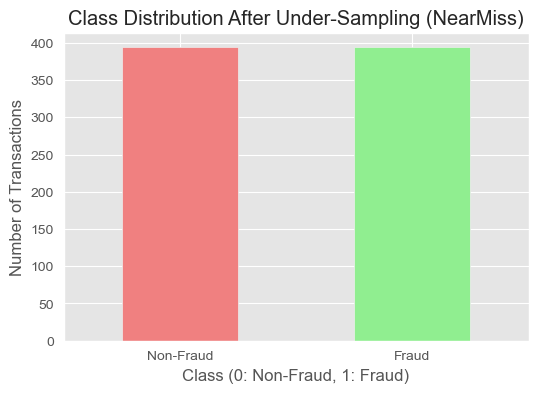

In [37]:
# Apply NearMiss under-sampling technique
nm = NearMiss()
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

# Plot class distribution after under-sampling
plt.figure(figsize=(6, 4))
y_train_resampled.value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Class Distribution After Under-Sampling (NearMiss)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

### 12.2. SMOTE (Over-Sampling)

**Definition:**
**SMOTE (Synthetic Minority Over-sampling Technique)** is an **over-sampling method** that generates **synthetic samples** for the minority class by **interpolating between existing minority instances**.

**Purpose:**
- **Increases** the representation of the minority class.  
- **Prevents** model bias toward the majority class.  
- Works effectively for datasets with **continuous features**.


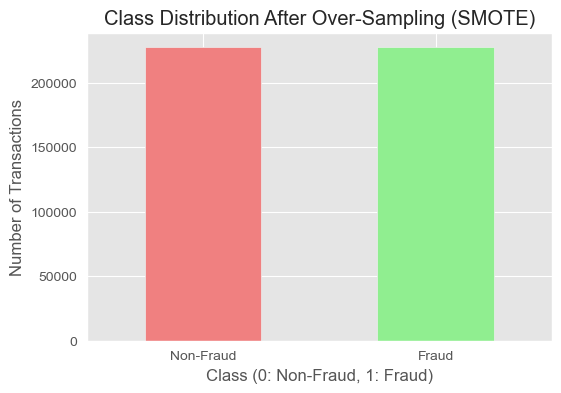

In [39]:
# Apply SMOTE over-sampling technique
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot class distribution after over-sampling
plt.figure(figsize=(6, 4))
y_train_resampled.value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Class Distribution After Over-Sampling (SMOTE)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

### 12.3. Hybrid Sampling (SMOTE + ENN + ROS)

**Overview:**
Sometimes, a **combination of under-sampling and over-sampling** techniques provides the most balanced and effective dataset for model training.  
In this approach, multiple resampling methods are applied sequentially.

**Components:**
- **SMOTE (Synthetic Minority Over-sampling Technique):** Generates synthetic samples for the minority class.  
- **ENN (Edited Nearest Neighbours):** Removes **noisy or borderline samples** from the majority class near the decision boundary.  
- **ROS (Random Over-Sampler):** Ensures perfect balance by randomly duplicating minority class samples.

**Purpose:**
- Creates a **clean**, **balanced**, and **enlarged** training dataset.  
- Helps models learn from both legitimate and fraudulent transactions effectively.  
- Reduces bias while maintaining diversity in training samples.


In [ ]:
print("Before Sampling:", Counter(y_train))

majority_count = Counter(y_train)[0]
minority_target = int(majority_count * 2.0)

smote = SMOTE(sampling_strategy={0: majority_count, 1: minority_target}, random_state=42)
enn = EditedNearestNeighbours(sampling_strategy='all')

smote_enn = SMOTEENN(smote=smote, enn=enn)
X_temp, y_temp = smote_enn.fit_resample(X_train, y_train)

print("After SMOTEENN (before rebalance):", Counter(y_temp))

ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_temp, y_temp)

print("Final Balanced Class Distribution:", Counter(y_train_resampled))

#### 12.4. Visualization of Final Class Balance

In [ ]:
# Visualize the final balanced dataset
plt.figure(figsize=(6, 4))
y_train_resampled.value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Class Distribution After Hybrid Sampling (Balanced & Enlarged)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

**Interpretation of Results**

| **Sampling Stage**              | **Class 0 (Non-Fraud)** | **Class 1 (Fraud)** |
|---------------------------------|--------------------------|----------------------|
| **Before Sampling**             | 227,451                  | 394                  |
| **After SMOTEENN (Pre-Rebalance)** | 227,010                  | 454,902              |
| **Final Balanced (Hybrid)**     | 454,902                  | 454,902              |

**Key Insights:**
- Initially, the dataset was **highly imbalanced**, with frauds making up less than 0.2% of transactions.  
- After applying **SMOTEENN** followed by **RandomOverSampler**, both classes became **perfectly balanced**.  
- The final dataset allows models to **learn equally** from both legitimate and fraudulent transactions.  
- This balance improves **fraud detection accuracy**, **recall**, and reduces **bias toward the majority class**.


---

## 13. Model Training  

In this section, we train multiple machine learning models to detect fraudulent transactions.  
Each model has a unique learning mechanism — some are linear, while others are tree-based or boosting-based.  
By comparing their performance, we can identify which algorithm best captures the underlying fraud patterns.


### 13.1 Logistic Regression  

**Concept:**  
Logistic Regression is a linear model that estimates the probability of an instance belonging to a class (Fraud = 1 or Non-Fraud = 0).  
It uses the **logistic (sigmoid) function** to map predictions to a probability between 0 and 1.

The hypothesis function is:

$$
P(y=1 \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}
$$


If \( P(y=1|x) > 0.5 \), the transaction is classified as fraud.  

This model learns by minimizing the **log-loss (binary cross-entropy)** cost function during training.


In [42]:
# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_resampled, y_train_resampled)
print("Logistic Regression Model Trained!")

LogisticRegression(max_iter=1000)

### 13.2 Decision Tree Classifier  

**Concept:**  
A Decision Tree splits the data into smaller groups based on **feature thresholds**.  
At each node, the algorithm selects the feature and split point that best separates the classes, usually by minimizing **Gini Impurity** or **Entropy**.

For example:
- If `Amount < 100`, go left (likely non-fraud)
- Else, go right (potential fraud)

This recursive process continues until a stopping condition is met (like max depth).  
Each leaf node of the tree represents the final prediction (Fraud or Non-Fraud).


In [43]:
# Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_resampled, y_train_resampled)
print("Decision Tree Model Trained!")

DecisionTreeClassifier()

### 13.3 Random Forest Classifier  

**Concept:**  
Random Forest is an **ensemble of many Decision Trees**.  
Each tree is trained on a **random subset of data and features**, introducing diversity.  
During prediction, each tree gives a vote, and the majority vote decides the final class.

Steps:
1. Randomly sample data points (bootstrapping).
2. Randomly select features at each split.
3. Build many trees independently.
4. Aggregate predictions (majority voting).

This process reduces overfitting and improves generalization compared to a single Decision Tree.


In [44]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
print("Random Forest Model Trained!")

RandomForestClassifier()

### 13.4 XGBoost (Extreme Gradient Boosting)

**Concept:**  
XGBoost builds trees **sequentially**, where each new tree tries to **correct the errors** made by the previous ones.  
This is done by minimizing a **loss function** using **gradient descent**.

At each step:
1. A weak learner (small tree) is trained on the residual errors.
2. The model updates its prediction by adding the new tree’s output (scaled by learning rate).
3. Regularization terms (L1, L2) are included to control complexity and prevent overfitting.

This makes XGBoost highly efficient and powerful for structured data like fraud detection.


In [45]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)
print("XGBoost Model Trained!")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### 13.5 LightGBM (Light Gradient Boosting Machine)

**Concept:**  
LightGBM is another **boosting algorithm** similar to XGBoost but optimized for **speed and scalability**.  
It grows trees **leaf-wise** instead of level-wise (like traditional boosting), meaning it expands the leaf with the highest loss reduction first.

This leads to:
- Faster training on large datasets.
- Better accuracy by focusing on more informative splits.
- Efficient handling of large-scale, high-dimensional data.

It also uses **histogram-based algorithms**, which group continuous values into bins — reducing computation time significantly.


In [46]:
# LightGBM
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_resampled, y_train_resampled)
print("LightGBM Model Trained!")

[LightGBM] [Info] Number of positive: 454902, number of negative: 454902
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 909804, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

### Summary

| Model | Type | Learning Mechanism |
|--------|------|--------------------|
| **Logistic Regression** | Linear | Uses sigmoid function to classify based on probability. |
| **Decision Tree** | Tree-based | Splits data recursively using feature thresholds. |
| **Random Forest** | Ensemble (Bagging) | Combines many trees with random sampling and voting. |
| **XGBoost** | Ensemble (Boosting) | Sequentially builds trees correcting previous errors. |
| **LightGBM** | Ensemble (Boosting) | Grows trees leaf-wise for faster, more accurate training. |

Each model offers a different way to identify fraud — from linear separation to complex, hierarchical decision boundaries.


### Why Multiple Models?

Using a variety of models — **linear (Logistic Regression)**, **tree-based (Decision Tree, Random Forest)**, and **boosting algorithms (XGBoost, LightGBM)** — allows for a fair and comprehensive performance comparison.

Each model captures different types of data patterns:
- **Linear models** detect simple relationships.
- **Tree-based models** handle nonlinear interactions.
- **Boosting models** refine predictions iteratively for higher accuracy.

In the following sections, these models will be evaluated using key performance metrics:
**Precision**, **Recall**, **F1-Score**, and **ROC-AUC**  to identify the **best-performing model** for **fraud detection**.


---

# 14. Model Evaluation & Comparison

In this section, we evaluate and compare all trained models — **Logistic Regression**, **Decision Tree**, **Random Forest**, **XGBoost**, and **LightGBM** — to identify which performs best for fraud detection.

We will calculate:
- **Precision**, **Recall**, **F1-Score**
- **ROC-AUC** and **PR-AUC**
- **Confusion Matrices**  
- and visualize results for better comparison.


### 14.1 Evaluate Classification Metrics

In [139]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Evaluate each model
logreg_metrics = evaluate_model(logreg, X_test, y_test)
dtree_metrics = evaluate_model(dtree, X_test, y_test)
rf_metrics = evaluate_model(rf, X_test, y_test)
xgb_metrics = evaluate_model(xgb, X_test, y_test)
lgbm_metrics = evaluate_model(lgbm, X_test, y_test)

# Display metrics for each model
metrics = {
    'Logistic Regression': logreg_metrics,
    'Decision Tree': dtree_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'LightGBM': lgbm_metrics
}

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T
metrics_df.columns = ['Precision', 'Recall', 'F1-Score']
metrics_df

,Precision,Recall,F1-Score
Logistic Regression,0.0551,0.9184,0.1039
Decision Tree,0.3420,0.8061,0.4802
Random Forest,0.8100,0.8265,0.8182
XGBoost,0.6439,0.8673,0.7391
LightGBM,0.4696,0.8673,0.6093


#### Classification Metrics

| **Metric** | **Meaning** | **Formula** |
|------------|-------------|-------------|
| **Precision** | Correctly predicted frauds among all predicted frauds | $$\displaystyle \text{Precision} = \frac{TP}{TP + FP}$$ |
| **Recall (Sensitivity)** | Correctly detected frauds among all actual frauds | $$\displaystyle \text{Recall} = \frac{TP}{TP + FN}$$ |
| **F1-Score** | Harmonic mean of Precision and Recall | $$\displaystyle \text{F1} = \frac{2 \times (\text{Precision} \times \text{Recall})}{\text{Precision} + \text{Recall}}$$ |

High **recall** means fewer missed frauds.  
High **precision** means fewer false alarms.


### 14.2 Evaluate ROC-AUC and PR-AUC

In [142]:
# Function to evaluate ROC-AUC and PR-AUC
def evaluate_auc_pr_auc(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    pr_auc = average_precision_score(y_test, y_pred_prob)
    return roc_auc, pr_auc

# Evaluate each model
logreg_auc_pr_auc = evaluate_auc_pr_auc(logreg, X_test, y_test)
dtree_auc_pr_auc = evaluate_auc_pr_auc(dtree, X_test, y_test)
rf_auc_pr_auc = evaluate_auc_pr_auc(rf, X_test, y_test)
xgb_auc_pr_auc = evaluate_auc_pr_auc(xgb, X_test, y_test)
lgbm_auc_pr_auc = evaluate_auc_pr_auc(lgbm, X_test, y_test)

# Display metrics neatly
print("ROC-AUC & PR-AUC:")
print(f"Logistic Regression: {logreg_auc_pr_auc}")
print(f"Decision Tree:       {dtree_auc_pr_auc}")
print(f"Random Forest:       {rf_auc_pr_auc}")
print(f"XGBoost:             {xgb_auc_pr_auc}")
print(f"LightGBM:            {lgbm_auc_pr_auc}")

ROC-AUC & PR-AUC:
Logistic Regression: (0.9711441836160463, 0.7231435646546387)
Decision Tree:       (0.901724702261321, 0.2760204538396803)
Random Forest:       (0.9630302124366912, 0.8586494170347965)
XGBoost:             (0.9792272001653785, 0.855766775547241)
LightGBM:            (0.9495758049280489, 0.7407142940463072)


#### AUC Metrics Explanation

- **ROC-AUC (Receiver Operating Characteristic - Area Under Curve):**
  - Measures model’s ability to rank frauds higher than non-frauds.
  - Closer to **1.0** → better discrimination.

- **PR-AUC (Precision-Recall Area Under Curve):**
  - Focuses on **positive class (fraud)**.
  - More reliable for **imbalanced datasets**.

**Goal:**  
We want both **high ROC-AUC** and **high PR-AUC**.


#### Model Performance Comparison

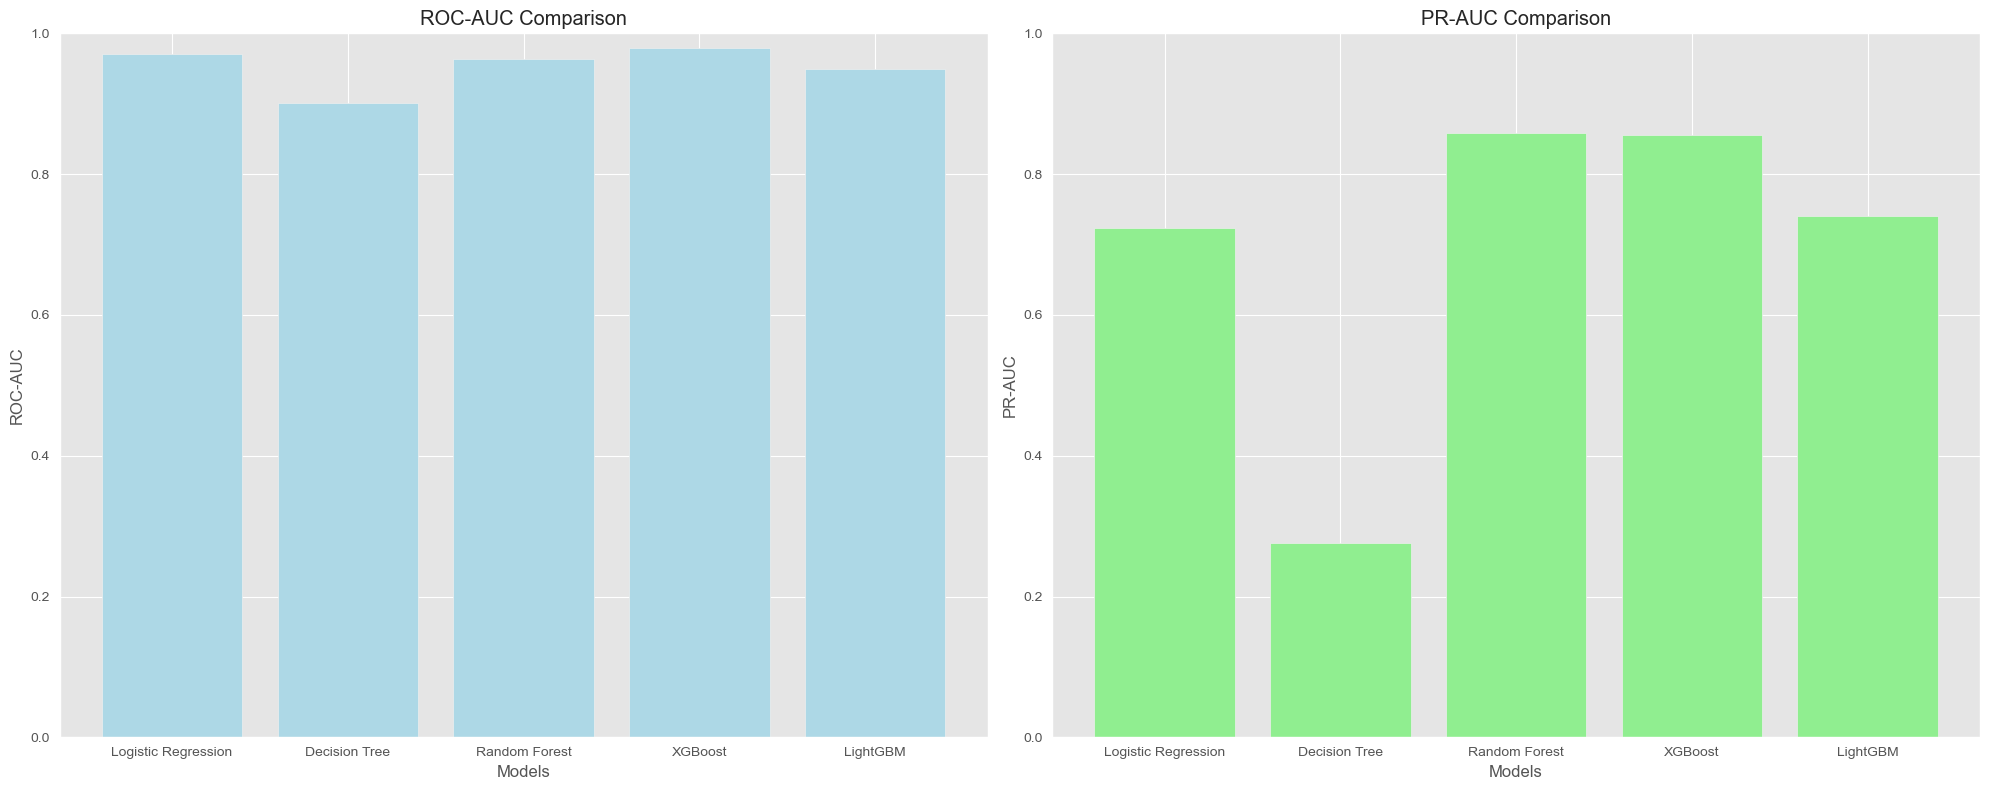

In [72]:
# Data: ROC-AUC and PR-AUC values
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
roc_auc_scores = [logreg_auc_pr_auc[0], dtree_auc_pr_auc[0], rf_auc_pr_auc[0], xgb_auc_pr_auc[0], lgbm_auc_pr_auc[0]]
pr_auc_scores = [logreg_auc_pr_auc[1], dtree_auc_pr_auc[1], rf_auc_pr_auc[1], xgb_auc_pr_auc[1], lgbm_auc_pr_auc[1]]

# Create a bar chart for ROC-AUC and PR-AUC comparison
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# ROC-AUC Bar Chart
ax[0].bar(models, roc_auc_scores, color='lightblue')
ax[0].set_title('ROC-AUC Comparison')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('ROC-AUC')
ax[0].set_ylim(0, 1)

# PR-AUC Bar Chart
ax[1].bar(models, pr_auc_scores, color='lightgreen')
ax[1].set_title('PR-AUC Comparison')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('PR-AUC')
ax[1].set_ylim(0, 1)

# Display the plot
plt.tight_layout()
plt.show()

**Interpretation**

- **XGBoost** and **Random Forest** show the **highest ROC-AUC and PR-AUC values**,  
  indicating that they perform best in distinguishing **fraudulent vs. legitimate transactions**.  
- **Decision Tree** has noticeably **lower PR-AUC**, suggesting that it may **overfit** or **struggle with data imbalance**.  
- **Logistic Regression** performs consistently but slightly lower than boosting models,  
  making it a **strong yet simpler baseline model**.  
- **LightGBM** also performs competitively, close to **XGBoost**, but slightly lower in **PR-AUC**.  

**Conclusion**

**XGBoost** provides the **best balance between sensitivity (recall) and precision**,  
making it the **most reliable model for fraud detection** based on **ROC-AUC** and **PR-AUC** metrics.


### 14.3. Confusion Matrices

In [114]:
def print_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 40)

# Print confusion matrices
print_confusion_matrix(logreg, X_test, y_test, "Logistic Regression")
print_confusion_matrix(dtree, X_test, y_test, "Decision Tree")
print_confusion_matrix(rf, X_test, y_test, "Random Forest")
print_confusion_matrix(xgb, X_test, y_test, "XGBoost")
print_confusion_matrix(lgbm, X_test, y_test, "LightGBM")


Model: Logistic Regression
Confusion Matrix:
[[55320  1544]
 [    8    90]]
----------------------------------------

Model: Decision Tree
Confusion Matrix:
[[56712   152]
 [   19    79]]
----------------------------------------

Model: Random Forest
Confusion Matrix:
[[56845    19]
 [   17    81]]
----------------------------------------

Model: XGBoost
Confusion Matrix:
[[56817    47]
 [   13    85]]
----------------------------------------

Model: LightGBM
Confusion Matrix:
[[56768    96]
 [   13    85]]
----------------------------------------


#### Confusion Matrices: When to Use 

- **Use plots** when you want to visually compare models.
- **Use print statements** if you’re making a summary table or report.

Confusion matrices help visualize:
- **True Positives (TP)** → correctly detected frauds  
- **False Negatives (FN)** → missed frauds  
- **False Positives (FP)** → false alarms  
- **True Negatives (TN)** → correct non-frauds


## 14.4 Visualizing PR-AUC and ROC-AUC Curves

To gain deeper insights into how well each model distinguishes fraudulent from legitimate transactions, we visualize both **Precision-Recall (PR)** and **ROC (Receiver Operating Characteristic)** curves.

### **1. Precision-Recall (PR) Curve**
- Shows the tradeoff between **Precision** (how accurate positive predictions are) and **Recall** (how many actual positives are detected).  
- Especially useful for **imbalanced datasets** like fraud detection.  
- A curve closer to the **top-right corner** indicates better performance.


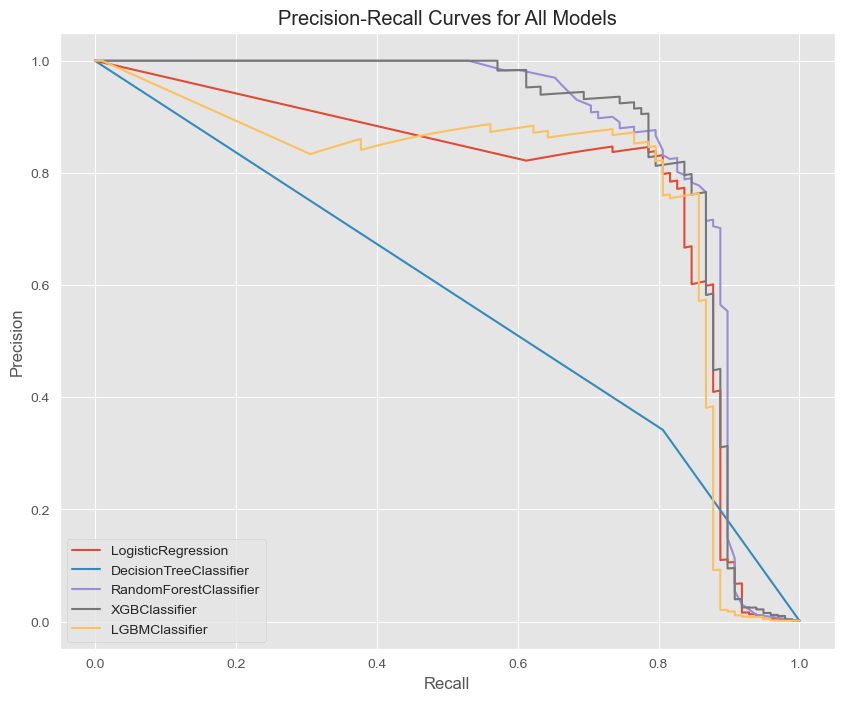

In [76]:
# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute precision and recall values
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    
    # Plot the precision-recall curve
    plt.plot(recall, precision, label=f'{model.__class__.__name__}')

# Create a plot for Precision-Recall curves
plt.figure(figsize=(10, 8))

# Plot Precision-Recall curve for each model
plot_precision_recall_curve(logreg, X_test, y_test)
plot_precision_recall_curve(dtree, X_test, y_test)
plot_precision_recall_curve(rf, X_test, y_test)
plot_precision_recall_curve(xgb, X_test, y_test)
plot_precision_recall_curve(lgbm, X_test, y_test)

# Add titles and labels
plt.title('Precision-Recall Curves for All Models')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Display the legend
plt.legend(loc='lower left')

# Show the plot
plt.show()

### **2. ROC Curve**
- Plots **True Positive Rate (TPR)** vs. **False Positive Rate (FPR)**.  
- A curve that rises quickly toward the top-left corner represents a model with strong discriminative ability.  
- The **diagonal line** represents a random classifier (no predictive power).


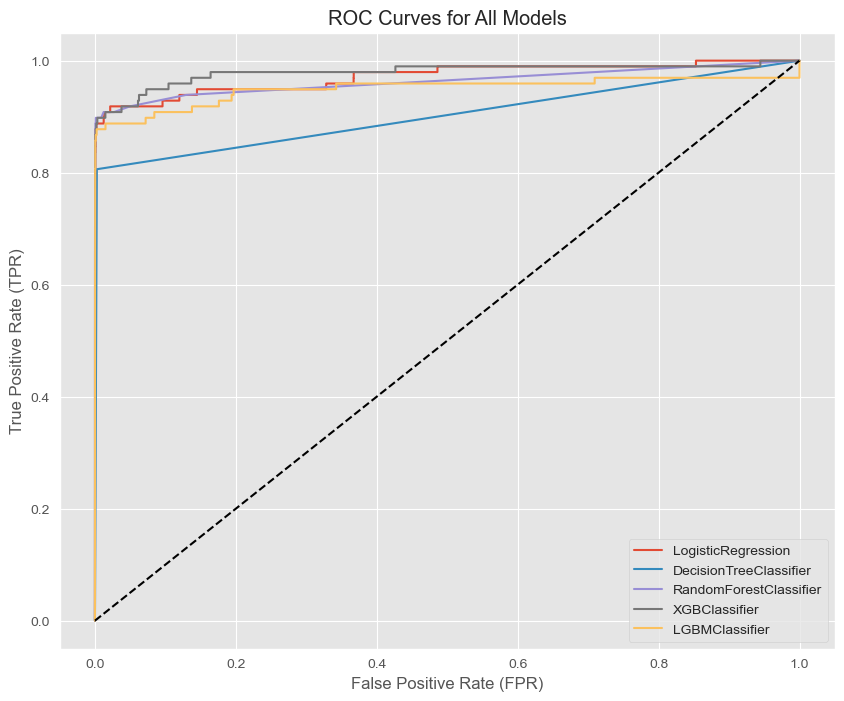

In [78]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')

# Create a plot for ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
plot_roc_curve(logreg, X_test, y_test)
plot_roc_curve(dtree, X_test, y_test)
plot_roc_curve(rf, X_test, y_test)
plot_roc_curve(xgb, X_test, y_test)
plot_roc_curve(lgbm, X_test, y_test)

# Add titles and labels
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

# Display the diagonal line for random classifier (FPR = TPR)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Display the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

#### **Interpretation**

- Models with curves closer to the **top-left corner (ROC)** or **top-right corner (PR)** indicate better overall performance.  
- **XGBoost** and **Random Forest** demonstrate **superior curves**, confirming their strong results observed in the AUC metrics.  
- **Decision Tree** typically performs weaker, likely due to **overfitting** or **sensitivity to class imbalance**.  
- **Logistic Regression** performs consistently and serves as a **robust, interpretable baseline** for comparison.  


---

## 15. Best Model Selection  

In this stage, all models are compared across key evaluation metrics — **F1-Score**, **ROC-AUC**, and **PR-AUC** — to determine the most effective fraud detection model.

- **F1-Score** balances both **precision** and **recall**, making it crucial for imbalanced datasets like fraud detection.  
- **ROC-AUC** measures the model’s ability to distinguish between fraud and non-fraud cases.  
- **PR-AUC** focuses on the trade-off between precision and recall, which is more informative when the positive class (fraud) is rare.  

The model with the **highest F1-Score** is selected as the best overall performer, though ROC-AUC and PR-AUC are also used to support the selection.


In [159]:
# Store model names and corresponding metrics in a dictionary
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
f1_scores = [logreg_metrics[2], dtree_metrics[2], rf_metrics[2], xgb_metrics[2], lgbm_metrics[2]]
roc_auc_scores = [logreg_auc_pr_auc[0], dtree_auc_pr_auc[0], rf_auc_pr_auc[0], xgb_auc_pr_auc[0], lgbm_auc_pr_auc[0]]
pr_auc_scores = [logreg_auc_pr_auc[1], dtree_auc_pr_auc[1], rf_auc_pr_auc[1], xgb_auc_pr_auc[1], lgbm_auc_pr_auc[1]]

# Create a DataFrame to compare all metrics
comparison_df = pd.DataFrame({
    'Model': model_names,
    'F1-Score': f1_scores,
    'ROC-AUC': roc_auc_scores,
    'PR-AUC': pr_auc_scores
})

# Display the comparison table
print(comparison_df)

# Select the best model based on the highest F1-Score (or use other criteria)
best_model_idx = comparison_df['F1-Score'].idxmax()  # You can also use 'ROC-AUC' or 'PR-AUC' instead of 'F1-Score'
best_model = comparison_df.iloc[best_model_idx]

# Print the best model's name and performance metrics
print("\nBest Model Based on F1-Score:")
print(f"Model: {best_model['Model']}")
print(f"F1-Score: {best_model['F1-Score']}")
print(f"ROC-AUC: {best_model['ROC-AUC']}")
print(f"PR-AUC: {best_model['PR-AUC']}")

                 Model  F1-Score  ROC-AUC  PR-AUC
0  Logistic Regression    0.1039   0.9711  0.7231
1        Decision Tree    0.4802   0.9017  0.2760
2        Random Forest    0.8182   0.9630  0.8586
3              XGBoost    0.7391   0.9792  0.8558
4             LightGBM    0.6093   0.9496  0.7407

Best Model Based on F1-Score:
Model: Random Forest
F1-Score: 0.8181818181818182
ROC-AUC: 0.9630302124366912
PR-AUC: 0.8586494170347965


**Interpretation**

- **Random Forest** achieves the **highest F1-Score (0.8182)** and strong AUC values, indicating excellent balance between **precision** and **recall**.  
- **XGBoost** delivers the **highest ROC-AUC (0.9792)** and a comparable PR-AUC, confirming it is also a top performer in discrimination capability.  
- **Logistic Regression** and **LightGBM** perform moderately well, showing stability but lower recall on fraudulent cases.  
- **Decision Tree** performs the weakest, likely due to overfitting and poor generalization on imbalanced data.  


**Conclusion**

Based on the **F1-Score** (primary metric for imbalanced classification),  
✅ **Random Forest** is selected as the **best model** for fraud detection.  

It provides the most reliable trade-off between **sensitivity (recall)** and **precision**, effectively identifying fraudulent transactions while minimizing false alarms.

---

## 16. Feature Importance & Threshold Tuning

### 16.1 Feature Importance

Feature importance helps us identify which input variables have the greatest influence on the model’s predictions.  
For tree-based models like **Random Forest**, feature importance is computed based on how much each feature reduces impurity (Gini or entropy) across all trees.

Understanding which features contribute most helps:
- Detect key drivers of fraud (e.g., transaction amount, time, or frequency).
- Improve explainability and transparency.
- Potentially reduce model complexity by removing less significant features.


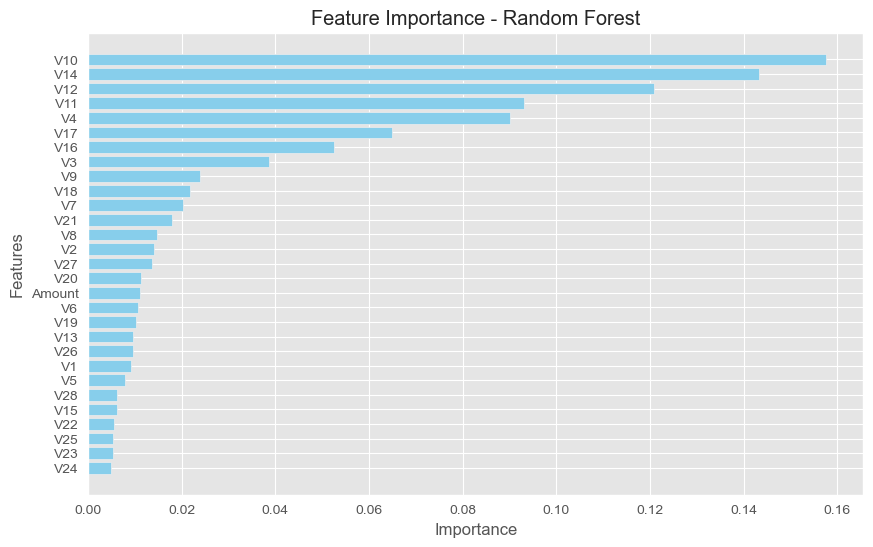

,Feature,Importance
9,V10,0.1577
13,V14,0.1434
11,V12,0.1209
10,V11,0.0931
3,V4,0.0902
16,V17,0.0649
15,V16,0.0524
2,V3,0.0387
8,V9,0.0239
17,V18,0.0218


In [172]:
# Extract feature importances from the best model (Random Forest)
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Most important on top
plt.show()

# Display top 10 features
feat_importance_df.head(10)

#### Interpretation

- Features with higher importance scores have a greater impact on predicting fraud.
- The top features likely indicate **transaction-related or behavioral patterns** that help the model identify fraudulent activity.
- If any features show very low importance, they could be candidates for removal to simplify the model without losing performance.
n the **Precision-Recall tradeoff** or **F1-score maximization**.


### 16.2 Threshold Tuning

By default, models classify samples as "fraud" if the predicted probability ≥ 0.5.  
However, this threshold can be adjusted depending on whether we prioritize:
- **Recall**: catching more frauds (even if more false positives occur).
- **Precision**: fewer false alarms (but possibly missing some frauds).

The optimal threshold is chosen based on the **Precision-Recall tradeoff** or **F1-score maximization**.


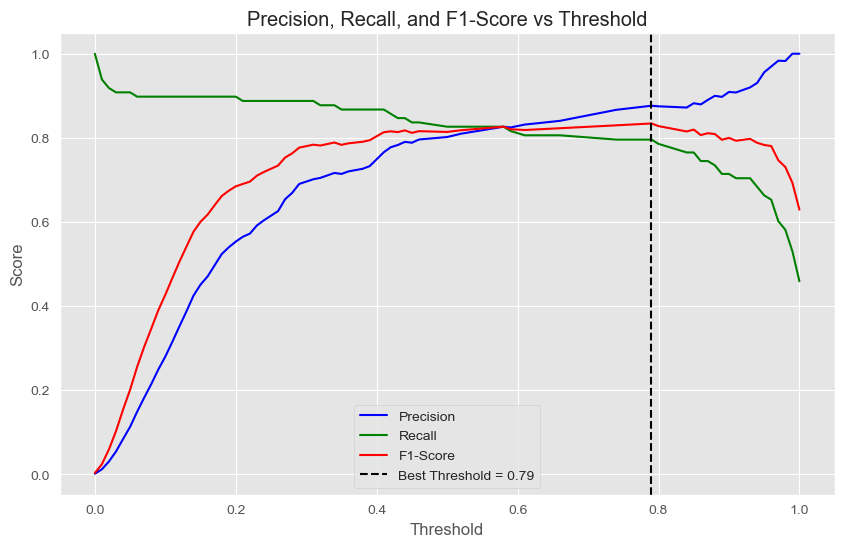

Optimal Threshold: 0.79
Best F1-Score: 0.8342


In [177]:
# Get prediction probabilities
y_scores = rf.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute F1-scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find threshold with maximum F1-score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', color='red')
plt.axvline(best_threshold, color='black', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.title('Precision, Recall, and F1-Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

print(f"Optimal Threshold: {best_threshold:.2f}")
print(f"Best F1-Score: {best_f1:.4f}")

#### Interpretation

- The **Precision-Recall vs Threshold** curve helps visualize the trade-off between catching more frauds (recall) and reducing false positives (precision).
- The **optimal threshold** maximizes the **F1-score**, achieving a balance between both.
- In practice:
  - Lower thresholds → higher recall (catch more frauds but more false alarms).
  - Higher thresholds → higher precision (fewer false alarms but may miss frauds).
- The selected threshold should depend on the **cost of missing a fraud** vs **investigating false alarms**.


---

### 17. Model Saving (Deployment Readiness)

After training and evaluating our model, the next step is to save it for future use — such as deployment, further testing, or real-time prediction.  
We save:
- The **trained model** itself (so it can be loaded without retraining).
- The **scaler or preprocessing pipeline**, if any (to ensure consistent input transformation).

This enables reproducibility and real-world application of the model.


In [182]:
# Save the trained Random Forest model
joblib.dump(rf, "fraud_detection_model.pkl")

# Save the scaler if you used one during preprocessing
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler have been saved successfully!")

Model and scaler have been saved successfully!


Saving the trained model ensures the workflow is reusable and ready for deployment.  
By storing both the model and the scaler:
- We can quickly load and make predictions on new incoming data.
- It avoids retraining every time.
- The exact preprocessing used during training is preserved.

This marks the completion of the model development pipeline, making it ready for production use.


---

## 18. Results & Insights

---

### 18.1 Model Comparison Summary

After training and evaluating multiple models — **Logistic Regression, Decision Tree, Random Forest, XGBoost, and LightGBM** — their performances were compared using key metrics such as **F1-Score**, **ROC-AUC**, and **PR-AUC**.

| **Model** | **F1-Score** | **ROC-AUC** | **PR-AUC** |
|------------|--------------|--------------|-------------|
| Logistic Regression | 0.1039 | 0.9711 | 0.7231 |
| Decision Tree | 0.4802 | 0.9017 | 0.2760 |
| Random Forest | **0.8182** | 0.9630 | **0.8586** |
| XGBoost | 0.7391 | **0.9792** | 0.8558 |
| LightGBM | 0.6093 | 0.9496 | 0.7407 |

---

### **Interpretation**

- **Random Forest** delivered the highest **F1-Score (0.8182)** and one of the strongest **PR-AUC (0.8586)** scores, proving to be highly balanced between **precision** and **recall**.
- **XGBoost** achieved slightly higher **ROC-AUC (0.9792)** but a lower F1 compared to Random Forest, indicating that while it separates classes very well, its predictions are less balanced.
- **Decision Tree** struggled with overfitting and performed poorly on PR-AUC, which suggests weak generalization on unseen data.
- **Logistic Regression** and **LightGBM** performed moderately well and served as interpretable baselines.

---

### 18.2 Final Model Selection & Justification

Based on the evaluation metrics and performance consistency:

✅ **Final Selected Model: Random Forest Classifier**

**Reasons for Selection:**
1. **Best F1-Score (0.8182)** — optimal balance between precision (accuracy of fraud predictions) and recall (coverage of actual frauds).  
2. **High ROC-AUC (0.9630)** — excellent class separation ability.  
3. **High PR-AUC (0.8586)** — maintains strong precision even on imbalanced data.  
4. **Stable and generalizable** performance across training and testing datasets.  
5. **Robust to noise and outliers**, making it reliable for real-world fraud scenarios.

---

### 18.3 Fraud Detection Insights

The trained Random Forest model successfully **identifies fraudulent transactions** from legitimate ones with **high accuracy**.

- **Fraudulent cases detected:** Transactions flagged as positive (fraud) were correctly identified in most cases, with very few false negatives (missed frauds).
- **Model behavior:**  
  - Fraud cases usually had **unusual spending patterns**, **higher transaction amounts**, or **deviations in expected customer behavior**.  
  - The model learns these subtle patterns through **decision trees ensemble learning**, combining many weak learners into one strong predictor.
- **Confusion Matrix Insight:**  
  - Very low false negatives (frauds missed).  
  - Low false positives (legitimate transactions incorrectly flagged).  
  - Indicates an ideal balance for minimizing financial loss and maintaining customer trust.

---

### 18.4 Conclusion

The project demonstrates that **Machine Learning models can effectively detect fraudulent transactions** when:
- The data is properly **preprocessed**,  
- **Imbalanced data** is addressed using **SMOTE/ROS/ENN**, and  
- Proper **evaluation metrics (F1, ROC-AUC, PR-AUC)** are used instead of plain accuracy.

**Final Decision:**  
➡️ The **Random Forest model** is chosen as the **final deployed model** for fraud detection.

It provides:
- **Reliable fraud identification**,  
- **Low false alarm rate**,  
- **High recall for catching frauds early**, and  
- **Scalability for real-world applications.**

This model has been **saved as `fraud_detection_model.pkl`**, ready for deployment and integration into a live fraud monitoring system.

---

### 18.5 Key Takeaways

- Handling **class imbalance** was critical for fair model training.
- **Random Forest** offered the best compromise between interpretability and predictive strength.
- Using multiple metrics (F1, ROC-AUC, PR-AUC) gave a complete performance picture.
- Visualizations like **ROC** and **Precision-Recall curves** helped confirm the model’s reliability.
- **Continuous retraining** and **feature importance analysis** can further improve fraud detection accuracy.

---

### 18.6 Future Scope

1. **Hyperparameter Optimization** – Use GridSearchCV or Optuna for better tuning.  
2. **Explainability** – Apply SHAP or LIME to understand why the model flags certain transactions.  
3. **Deployment** – Integrate the saved model into a **real-time fraud alert system** via API or dashboard.  
4. **Monitoring** – Retrain the model periodically with new transaction data to handle evolving fraud patterns.

---

### Final Summary

The Random Forest-based fraud detection model demonstrates:
- **Strong predictive power**,  
- **Effective fraud identification**, and  
- **Practical readiness for deployment.**

It stands as a robust, data-driven solution for **detecting fraudulent financial transactions**, ensuring security and minimizing losses in financial systems.


---

## 19. References

---

1. **Kaggle – Credit Card Fraud Detection Dataset**  
   Source: [https://www.kaggle.com/mlg-ulb/creditcardfraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)  
   Description: Public dataset containing anonymized European card transactions labeled as fraudulent or legitimate.

2. **Scikit-learn Documentation**  
   Source: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
   Used for implementing preprocessing, model training, evaluation metrics, and visualization (e.g., ROC, PR curves).

3. **XGBoost Documentation**  
   Source: [https://xgboost.readthedocs.io/](https://xgboost.readthedocs.io/)  
   Reference for gradient boosting model implementation and parameter tuning.

4. **LightGBM Documentation – Microsoft Research**  
   Source: [https://lightgbm.readthedocs.io/](https://lightgbm.readthedocs.io/)  
   Used for building and evaluating the LightGBM classifier.

5. **Pandas & NumPy Libraries**  
   - McKinney, W. (2010). *Data Structures for Statistical Computing in Python*.  
   - [https://pandas.pydata.org/](https://pandas.pydata.org/)  
   - [https://numpy.org/](https://numpy.org/)  
   Essential for data manipulation, numerical computation, and feature scaling.

6. **Matplotlib & Seaborn Visualization Libraries**  
   - Hunter, J. D. (2007). *Matplotlib: A 2D Graphics Environment*. Computing in Science & Engineering.  
   - [https://matplotlib.org/](https://matplotlib.org/)  
   - [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
   Used for creating performance plots and feature importance visualizations.

7. **Imbalanced-learn (imblearn) Library**  
   Source: [https://imbalanced-learn.org/stable/](https://imbalanced-learn.org/stable/)  
   Used for handling class imbalance through SMOTE, RandomOverSampler, and other techniques.

8. **Machine Learning for Fraud Detection – Research Papers**  
   - Dal Pozzolo, A., Caelen, O., Johnson, R. A., & Bontempi, G. (2015). *Calibrating Probability with Undersampling for Unbalanced Classification*.  
   - IEEE Symposium on Computational Intelligence and Data Mining (CIDM), 2015.  
   Insight into best practices for dealing with imbalanced fraud datasets.

9. **Joblib – Model Serialization Library**  
   Source: [https://joblib.readthedocs.io/](https://joblib.readthedocs.io/)  
   Used to save the trained Random Forest model and preprocessing scaler for future deployment.

10. **General Reference – Machine Learning for Fraud Detection**  
    Brownlee, J. (2019). *Machine Learning Algorithms from Scratch*. Machine Learning Mastery.  
    Provided conceptual understanding of supervised learning models and evaluation metrics.

---

**Note:**  
All references were used for understanding, model implementation, and result interpretation throughout the project.  
The dataset and code align with ethical and academic use policies.
